In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63621_U')

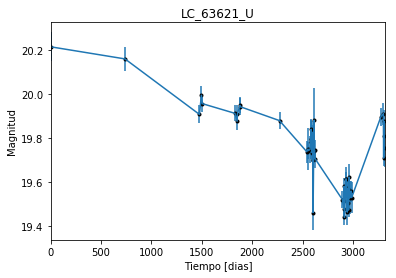

In [2]:
data = np.genfromtxt('LC_63621_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63621_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

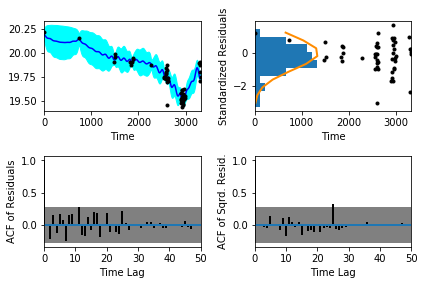

In [5]:
sample.assess_fit()

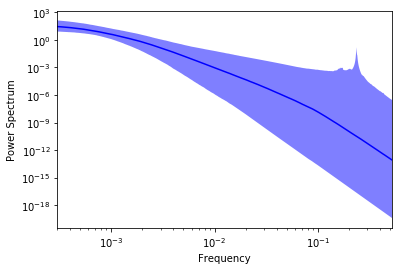

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_63621_U')

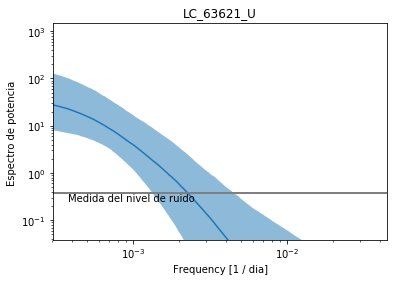

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63621_U')

Text(0.5,1,'Prediccion , valor esperado LC_63621_U')

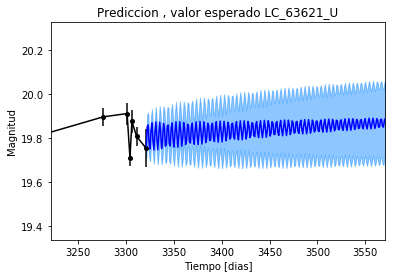

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63621_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63621_U')

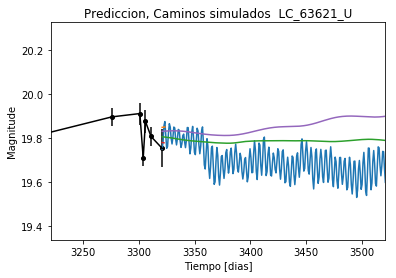

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63621_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63621_U')

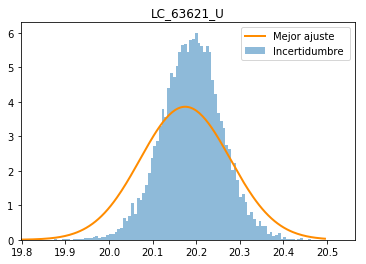

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63621_U')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_U')

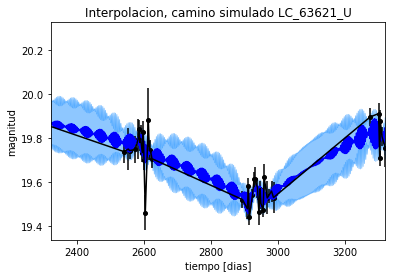

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_U')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_U')

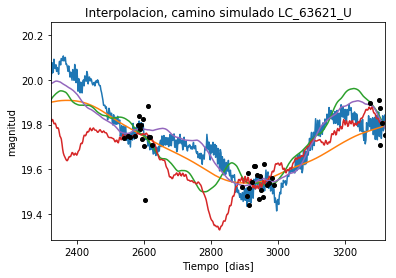

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 507.95961679
Median: 0.00819366187972
Standard deviation: 0.197023937889
68% credibility interval: [ 0.00068911  0.17526822]
95% credibility interval: [  3.46947402e-04   7.68171286e-01]
99% credibility interval: [  3.12920348e-04   9.70215489e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 690.006877714
Median: 0.000985836525379
Standard deviation: 0.0616386517163
68% credibility interval: [ 0.00039547  0.01298024]
95% credibility interval: [ 0.00031425  0.16132622]
99% credibility interval: [  3.03465674e-04   4.98046823e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 639.520591029
Median: 0.0110145418121
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 128.184559015
Median: 72.0851943048
Standard deviation: 1.96369678571
68% credibility interval: [ 70.29415232  73.30004893]
95% credibility interval: [ 67.79706262  77.33947573]
99% credibility interval: [ 65.49652468  77.78911697]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 457.622071531
Median: 0.573550883744
Standard deviation: 1.99118680526
68% credibility interval: [ 0.05423072  3.30471222]
95% credibility interval: [ 0.01369483  6.63514001]
99% credibility interval: [ 0.00962513  9.52159658]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 404.484019364
Median: 0.211813795656
Standard deviation: 7.74506546516
68% credibility interval: [ 0.00722911  3.23083326]
95% credibility interval: [  4.20218132e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0719688
Median: 2.00027922816e-36
Standard deviation: 1.26305062755e+65
68% credibility interval: [  4.50005922e-110   7.08746348e-012]
95% credibility interval: [  1.74501507e-295   1.62880623e-001]
99% credibility interval: [  2.37486206e-306   4.88592467e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2262.0904985
Median: 19.93831429
Standard deviation: 0.132253404292
68% credibility interval: [ 19.8230631   20.04583809]
95% credibility interval: [ 19.68906643  20.22412854]
99% credibility interval: [ 19.53495377  20.36053712]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 471.804704282
Median: 0.000800335036126
Standard deviation: 0.201286186081
68% credibility interval: [ 0.          0.23580824]
95% credibility interval: [ 0.          0.81474658]
99% credibility interval: [ 0.          0.98743922]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 471.804704282
Median: 0.000800335036126
Standard deviation: 0.201286186081
68% credibility interval: [ 0.          0.23580824]
95% credibility interval: [ 0.          0.81474658]
99% credibility interval: [ 0.          0.98743922]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 716.091139014
Median: 0.0
Standard deviation: 0.000207473760181
68

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 128.184559015
Median: 72.0851943048
Standard deviation: 1.96369678571
68% credibility interval: [ 70.29415232  73.30004893]
95% credibility interval: [ 67.79706262  77.33947573]
99% credibility interval: [ 65.49652468  77.78911697]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3682.36629541
Median: 0.046498926269
Standard deviation: 0.0615802791452
68% credibility interval: [ 0.02748212  0.09574149]
95% credibility interval: [ 0.01740719  0.20825933]
99% credibility interval: [ 0.01338457  0.36283654]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 411.268653299
Median: 1.36250920876
Standard deviation: 0.230511098996
68% credibility interval: [ 1.15198401  1.59722524]
95% credibility interval: [ 0.9100448   1.82191811]
99% credibility interval: [ 0.80482855  1.93935294]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 335.788662886
Median: 3.3429143947e-05
Standard deviation: 0.143258864074
68% credibility interval: [  6.26774656e-07   3.42990927e-03]
95% credibility interval: [  1.99683946e-08   7.39753084e-02]
99% credibility interval: [  3.10515529e-09   5.99928301e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 507.95961679
Median: (-0.0514822959347+0j)
Standard deviation: 1.76974657
68% credibility interval: [-1.10124268-0.3952645j  -0.00432981-1.49407908j]
95% credibility interval: [ -4.82656254e+00+0.j          -2.17993482e-03-0.64711314j]
99% credibility interval: [ -6.09604370e+00+0.j          -1.96613653e-03-0.31185883j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 690.006877714
Median: (-0.00619419357154+0.00624421518828j)
Standard deviation: 1.32268814315
68% credibility interval: [-0.08155728+0.79245345j -0.00248481+0.79396523j]
95% credibility interval: [-1.01364253 +4.22879992e-01j -0.00197446 +2.77098410e-04j]
99% credibility interval: [ -3.12932048e+00+3.11086603j  -1.90673106e-03+0.j        ]
Posterior summar